# Make a default payment or not in the next month prediction using Support Vector Machine

In [5]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn import model_selection

In [6]:
#Importing DataSet
df = pd.read_csv('credit card taiwan svm algorithm.csv')

In [7]:
#Showing DataSet
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24.0,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26.0,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,NaN,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,NaN,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2018.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57.0,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39.0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43.0,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37.0,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41.0,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [8]:
#Checking Shape
df.shape

(30000, 25)

In [9]:
#Checking Null Values
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           2
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

# Null Value Handling

In [10]:
#Finding Mean of Age Column
missing = df.AGE.median()

In [11]:
df.AGE = df.AGE.fillna(missing)

In [12]:
#Checking Only One Column (AGE) is Null or Not
df.AGE.isnull().sum()

0

In [13]:
df.shape

(30000, 25)

In [14]:
#Describe the whole Data through each Column
print (df.describe())

                 ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485400     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904      1.123802

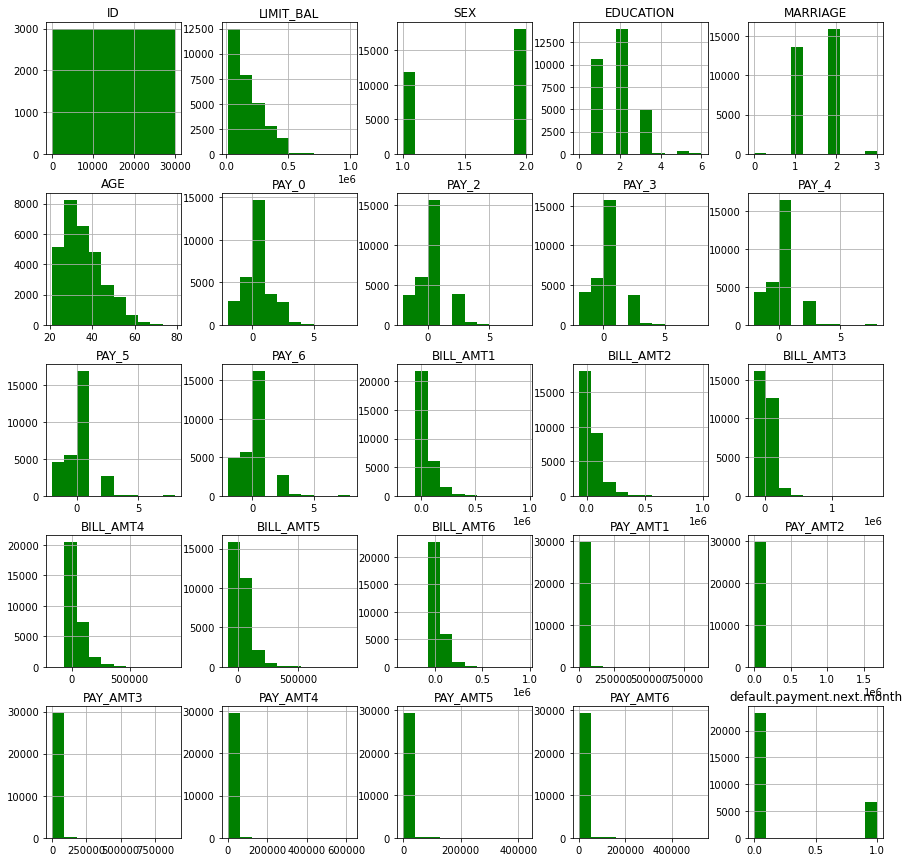

In [15]:
#Plotting the DataSet
df.hist(figsize = (15, 15), color = 'green')
plt.show()

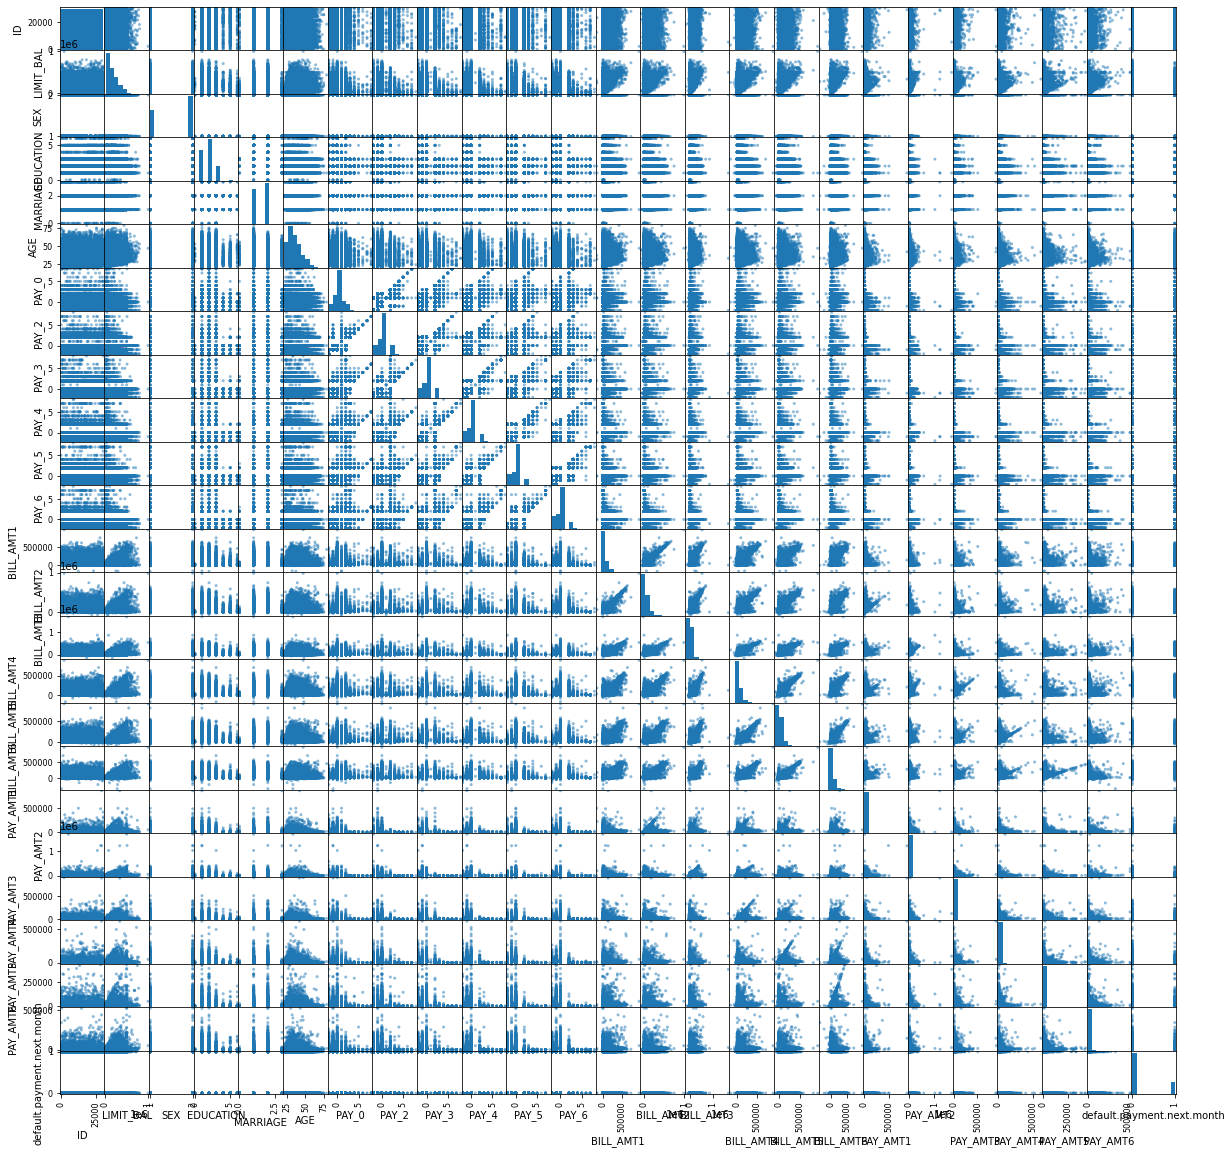

In [16]:
#Scattering the Plot
scatter_matrix(df, figsize = (20, 20))
plt.show()

<AxesSubplot:>

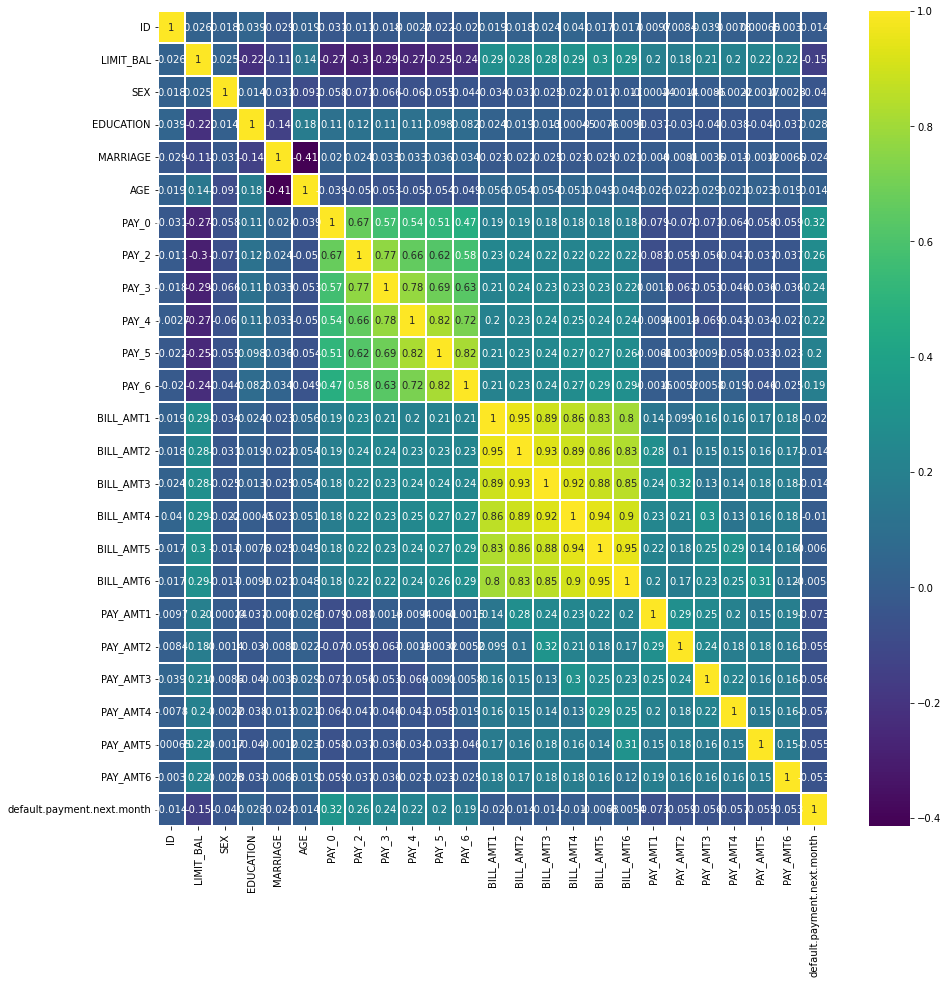

In [17]:
#Correlation Matrix
corrmat = df.corr()
plt.figure(figsize = (15, 15))
sns.heatmap(corrmat, cmap = 'viridis', annot = True, linewidths = '.25')

# Dividing Features and Label Comuns

In [18]:
x = df.drop(['default.payment.next.month'], axis = 'columns')

In [19]:
#Showing the Values of Feature Columns
x

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,20000.0,2,2,1,24.0,2,2,-1,-1,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,2,120000.0,2,2,2,26.0,-1,2,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,3,90000.0,2,2,2,34.0,0,0,0,0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,4,50000.0,2,2,1,34.0,0,0,0,0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2018.0,1200.0,1100.0,1069.0,1000.0
4,5,50000.0,1,2,1,57.0,-1,0,-1,0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39.0,0,0,0,0,...,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29996,29997,150000.0,1,3,2,43.0,-1,-1,-1,-1,...,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29997,29998,30000.0,1,2,2,37.0,4,3,2,-1,...,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29998,29999,80000.0,1,3,1,41.0,1,-1,0,0,...,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


In [20]:
y = df['default.payment.next.month']

In [21]:
#showing the Value of Y Column
y

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default.payment.next.month, Length: 30000, dtype: int64

# Dividing Data into Training and Testing

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = .30, random_state = 1)

In [24]:
#Showing xtrain
xtrain

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
4936,4937,20000.0,1,1,2,24.0,-1,-1,-1,-1,...,390.0,780.0,0.0,0.0,390.0,390.0,780.0,0.0,0.0,0.0
4788,4789,120000.0,1,2,1,52.0,2,0,0,0,...,105262.0,46605.0,45590.0,46204.0,4449.0,2731.0,3000.0,5000.0,3000.0,3000.0
8447,8448,70000.0,2,2,2,26.0,0,0,0,0,...,26103.0,28342.0,24894.0,25272.0,3003.0,5106.0,4026.0,755.0,1029.0,5303.0
4535,4536,230000.0,1,2,2,37.0,1,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27563,27564,130000.0,1,2,2,56.0,0,0,0,0,...,111780.0,116357.0,96936.0,98173.0,4000.0,5000.0,8000.0,4000.0,4000.0,5000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17289,17290,170000.0,2,3,1,40.0,1,2,0,0,...,20619.0,19520.0,5200.0,0.0,0.0,2000.0,1136.0,1000.0,0.0,36679.0
5192,5193,330000.0,2,1,1,41.0,-1,-1,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12172,12173,50000.0,1,2,2,22.0,0,0,0,0,...,35458.0,19778.0,19929.0,19790.0,1707.0,1321.0,687.0,705.0,811.0,874.0
235,236,80000.0,1,1,2,35.0,-1,-1,-1,-1,...,6848.0,1719.0,1378.0,19942.0,3983.0,6853.0,1719.0,1378.0,19942.0,2418.0


In [25]:
#Showing ytrain
ytrain

4936     0
4788     0
8447     1
4535     1
27563    0
        ..
17289    1
5192     0
12172    0
235      0
29733    0
Name: default.payment.next.month, Length: 21000, dtype: int64

# Model Developing using Support Vector Machine

In [26]:
from sklearn.svm import SVC

In [27]:
svm = SVC()

In [28]:
#Training the DataSet
svm.fit(xtrain, ytrain)

SVC()

In [29]:
pred = svm.predict(xtest)

In [30]:
svmsr = svm.score(xtest, ytest)

# Peformance Calculation of Support Vector Machine

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
ac1 = accuracy_score(ytest, pred)

In [33]:
print ('Accuracy of Support Vector Machine is: ', ac1 * 100, '%')

Accuracy of Support Vector Machine is:  77.77777777777779 %


In [34]:
from sklearn.metrics import confusion_matrix

In [35]:
cm1 = confusion_matrix(ytest, pred)

In [36]:
print (cm1)

[[7000    0]
 [2000    0]]


Text(33.0, 0.5, 'Actual Label')

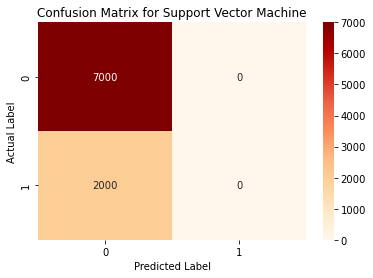

In [37]:
#Visualization of the Confusion Matrix
p = sns.heatmap(pd.DataFrame(cm1), annot = True, cmap = 'OrRd', fmt = 'g')
plt.title('Confusion Matrix for Support Vector Machine')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

In [38]:
from sklearn.metrics import classification_report

In [39]:
cr1 = classification_report(ytest, pred)

J:\ML\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
J:\ML\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
J:\ML\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
print (cr1)

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      7000
           1       0.00      0.00      0.00      2000

    accuracy                           0.78      9000
   macro avg       0.39      0.50      0.44      9000
weighted avg       0.60      0.78      0.68      9000



# Model Developing using Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
rf = RandomForestClassifier(n_estimators = 100)

In [43]:
rf.fit(xtrain, ytrain)

RandomForestClassifier()

In [44]:
pred = rf.predict(xtest)

# Performance Calculation

In [45]:
from sklearn.metrics import accuracy_score

In [46]:
as2 = accuracy_score(ytest, pred)

In [47]:
print ('Accuracy of Random Forest is: ', as2 * 100, '%')

Accuracy of Random Forest is:  81.44444444444444 %


In [48]:
from sklearn.metrics import confusion_matrix

In [49]:
cm2 = confusion_matrix(ytest, pred)

In [50]:
print (cm2)

[[6625  375]
 [1295  705]]


Text(33.0, 0.5, 'Actual Label')

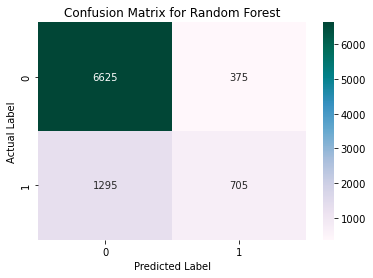

In [51]:
#Visualization of the Confusion Matrix
p = sns.heatmap(pd.DataFrame(cm2), annot = True, cmap = 'PuBuGn', fmt = 'g')
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

In [52]:
from sklearn.metrics import classification_report

In [53]:
cr2 = classification_report(ytest, pred)

In [54]:
#Printing Classification Report
print (cr2)

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7000
           1       0.65      0.35      0.46      2000

    accuracy                           0.81      9000
   macro avg       0.74      0.65      0.67      9000
weighted avg       0.80      0.81      0.79      9000



# Model Developing using Decision Tree

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
dt = DecisionTreeClassifier()

In [57]:
dt.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [58]:
dt.predict(xtest)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [59]:
dt.score(xtest, ytest)

0.7217777777777777

# Performance Calculation

In [60]:
from sklearn.metrics import accuracy_score

In [61]:
ac3 = accuracy_score(ytest, pred)

In [63]:
print ('Accuracy of Decision Tree is: ', ac3 * 100, '%')

Accuracy of Decision Tree is:  81.44444444444444 %


In [64]:
from sklearn.metrics import confusion_matrix

In [65]:
cm3 = confusion_matrix(ytest, pred)

In [66]:
print (cm3)

[[6625  375]
 [1295  705]]


Text(33.0, 0.5, 'Actual Label')

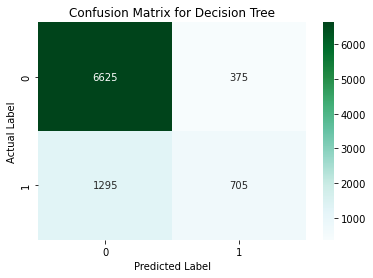

In [67]:
#Visualization of the Confusion Matrix
p = sns.heatmap(pd.DataFrame(cm3), annot = True, cmap = 'BuGn', fmt = 'g')
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

In [68]:
from sklearn.metrics import classification_report

In [69]:
cr3 = classification_report(ytest, pred)

In [70]:
print (cr3)

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7000
           1       0.65      0.35      0.46      2000

    accuracy                           0.81      9000
   macro avg       0.74      0.65      0.67      9000
weighted avg       0.80      0.81      0.79      9000



# Model Developing using Logistic Regression

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
lr = LogisticRegression()

In [73]:
lr.fit(xtrain, ytrain)

LogisticRegression()

In [74]:
pred = lr.predict(xtest)

In [75]:
lr.score(xtest, ytest)

0.7777777777777778

# Performance Calculation

In [76]:
from sklearn.metrics import accuracy_score

In [77]:
ac4 = accuracy_score(ytest, pred)

In [78]:
print ('Accuracy of Logistic Regression is: ', ac4 * 100, '%')

Accuracy of Logistic Regression is:  77.77777777777779 %


In [79]:
from sklearn.metrics import confusion_matrix

In [80]:
cf4 = confusion_matrix(ytest, pred)

In [81]:
print (cf4)

[[7000    0]
 [2000    0]]


Text(33.0, 0.5, 'Actual Label')

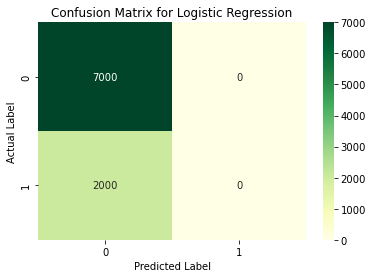

In [82]:
#Visualization of the Confusion Matrix
p = sns.heatmap(pd.DataFrame(cf4), annot = True, cmap = 'YlGn', fmt = 'g')
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

In [83]:
from sklearn.metrics import classification_report

In [84]:
cr4 = classification_report(ytest, pred)

J:\ML\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
J:\ML\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
J:\ML\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [85]:
print (cr4)

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      7000
           1       0.00      0.00      0.00      2000

    accuracy                           0.78      9000
   macro avg       0.39      0.50      0.44      9000
weighted avg       0.60      0.78      0.68      9000



# Model Developing using Gaussian Naive Bayes

In [86]:
from sklearn.naive_bayes import GaussianNB

In [87]:
gnb = GaussianNB()

In [88]:
gnb.fit(xtrain, ytrain)

GaussianNB()

In [89]:
pred = gnb.predict(xtest)

In [90]:
gnb.score(xtest, ytest)

0.37744444444444447

# Performance Calculation

In [91]:
from sklearn.metrics import accuracy_score

In [92]:
ac5 = accuracy_score(ytest, pred)

In [93]:
print ('Accuracy of Gaussian Naive Bayes is: ', ac5, '%')

Accuracy of Gaussian Naive Bayes is:  0.37744444444444447 %


In [94]:
from sklearn.metrics import confusion_matrix

In [95]:
cf5 = confusion_matrix(ytest, pred)

In [96]:
print (cf5)

[[1606 5394]
 [ 209 1791]]


Text(33.0, 0.5, 'Actual Label')

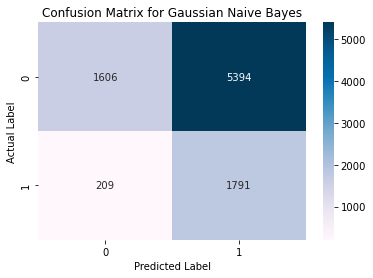

In [97]:
#Visualization of the Confusion Matrix
p = sns.heatmap(pd.DataFrame(cf5), annot = True, cmap = 'PuBu', fmt = 'g')
plt.title('Confusion Matrix for Gaussian Naive Bayes')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

In [98]:
from sklearn.metrics import classification_report

In [99]:
cr5 = classification_report(ytest, pred)

In [100]:
print (cr5)

              precision    recall  f1-score   support

           0       0.88      0.23      0.36      7000
           1       0.25      0.90      0.39      2000

    accuracy                           0.38      9000
   macro avg       0.57      0.56      0.38      9000
weighted avg       0.74      0.38      0.37      9000



# Model Developing using K-Nearest Neighbors

In [101]:
from sklearn.neighbors import KNeighborsClassifier

In [102]:
knc = KNeighborsClassifier()

In [103]:
knc.fit(xtrain, ytrain)

KNeighborsClassifier()

In [104]:
pred = knc.predict(xtest)

In [105]:
knc.score(xtest, ytest)

0.75

# Performance Calculation

In [106]:
from sklearn.metrics import accuracy_score

In [107]:
as6 = accuracy_score(ytest, pred)

In [108]:
print ('Accuracy Score of K-Nearest Neighbors is: ', as6 * 100, '%')

Accuracy Score of K-Nearest Neighbors is:  75.0 %


In [109]:
from sklearn.metrics import confusion_matrix

In [110]:
cm6 = confusion_matrix(ytest, pred)

In [111]:
print (cm6)

[[6401  599]
 [1651  349]]


Text(33.0, 0.5, 'Actual Label')

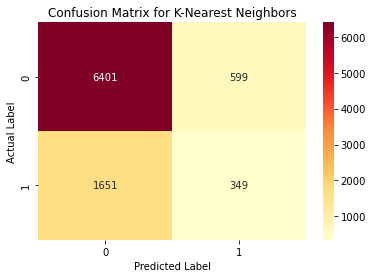

In [112]:
#Visualization of the Confusion Matrix
p = sns.heatmap(pd.DataFrame(cm6), annot = True, cmap = 'YlOrRd', fmt = 'g')
plt.title('Confusion Matrix for K-Nearest Neighbors')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

In [113]:
from sklearn.metrics import classification_report

In [114]:
cr6 = classification_report(ytest, pred)

In [115]:
print (cr6)

              precision    recall  f1-score   support

           0       0.79      0.91      0.85      7000
           1       0.37      0.17      0.24      2000

    accuracy                           0.75      9000
   macro avg       0.58      0.54      0.54      9000
weighted avg       0.70      0.75      0.71      9000



# Model Developing using Linear Discriminant Analysis 

In [116]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [117]:
ldm = LinearDiscriminantAnalysis()

In [118]:
ldm.fit(xtrain, ytrain)

LinearDiscriminantAnalysis()

In [119]:
pred = ldm.predict(xtest)

In [120]:
ldm.score(xtest, ytest)

0.8084444444444444

# Performance Calculation

In [121]:
from sklearn.metrics import accuracy_score

In [122]:
as7 = accuracy_score(ytest, pred)

In [123]:
print ('Accuracy Score of Linear Discriminant Analysis is: ', as7 * 100, '%')

Accuracy Score of Linear Discriminant Analysis is:  80.84444444444443 %


In [124]:
from sklearn.metrics import confusion_matrix

In [125]:
cm7 = confusion_matrix(ytest, pred)

In [126]:
print (cm7)

[[6789  211]
 [1513  487]]


Text(33.0, 0.5, 'Actual Label')

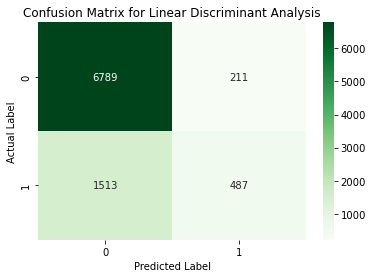

In [127]:
#Visualization of the Confusion Matrix
p = sns.heatmap(pd.DataFrame(cm7), annot = True, cmap = 'Greens', fmt = 'g')
plt.title('Confusion Matrix for Linear Discriminant Analysis')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

In [128]:
from sklearn.metrics import classification_report

In [129]:
cr7 = classification_report(ytest, pred)

In [130]:
print (cr7)

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      7000
           1       0.70      0.24      0.36      2000

    accuracy                           0.81      9000
   macro avg       0.76      0.61      0.62      9000
weighted avg       0.79      0.81      0.77      9000

